# Import Libs

In [ ]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import shutil
import sys
import os.path

# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass


# some stock-specific packages
!pip install yahoo_fin

!pip install requests_html
from yahoo_fin import *
import yahoo_fin.stock_info as si

# Install modeling module and solver
%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.8 MB/s eta 0:00:00
[ipopt-linux64.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of ipopt-linux64 or
        ipopt-linux64.zip, and cannot find ipopt-linux64.ZIP, period.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.7 MB/s eta 0:00:00
  Prepa

# Sectors assigned to Group 1: Healthcare, Consumer Staples, Energy

## Overview of companies in the three sectors of Group 1
### Healthcare Sector


> #### 1. Cigna (CI)
- The Cigna Group is a health insurance and pharmacy benefits management(PBM) company headquartered in Connecticut, United States. The company's market capitalization is currently around 76.907 billion dollars, and its PBM services have been greatly expanded following its merger with Express Scripts in 2018.

> #### 2. UnitedHealth Group (UNH)
- UnitedHealth Group is a diversified healthcare company which is headquartered in Minnetonka, Minnesota with a market capitalization of 407.752 billion dollars. It provide four segments businesses: UnitedHealthcare, Optum Health, Optum Insight, and Optum Rx. It offers health benefit plans and services, pharmacy care services and programs, software and information products, and outsourcing contracts to various organizations.

> #### 3. Abbott Lab (ABT)
- Abbott Laboratories is a global healthcare company  founded in 1888 and is based in North Chicago, Illinois with a market capitalization of 181.407 billion dollars.  Abbott Lab develops and sells healthcare products. It has four segments: Established Pharmaceutical Products, Diagnostic Products, Nutritional Products, and Medical Devices.

### Consumer Staples sectors
> #### 1. COSTCO (CST)
- Costco Wholesale Corporation is a retail company which is headquatered in Issaquah, Washington. COSTCO operates membership warehouses in multiple countries, offering a wide range of branded and private-label products in various merchandise categories. Its market capitalization is 219.466 billion dollars.

> #### 2. Kraft Heinz (KHC)
- The Kraft Heinz Company is a global  food and beverage products manufacturers. Its products includes condiments, sauces, cheese and dairy products, meals, meats, refreshment beverages, coffee, and grocery products. The company is headquartered in Pittsburgh, Pennsylvania and its market capitalization is 48.215 billion dollars.  

> #### 3. Proctor and Gamble (PG)
- Procter & Gamble is a global company that produces consumer packaged goods. Its products include personal care, beauty, grooming, healthcare, fabric and home care, and baby and family care. Its market capitalization is 356.523 billion dollars and is headquartered in Cincinnati, Ohio.


### Energy sectors
> #### 1. Halliburton (HAL)
- Halliburton is a global oil and gas products and service provider in energy industry through two segments: Completion and Production, and Drilling and Evaluation. Halliburton also offers cloud-based digital services and artificial intelligence solutions for subsurface insights, integrated well construction, and reservoir and production management. The company  is headquartered in Houston, Texas and its market caplization is 30.51 billion dollars.


> #### 2. Baker Hughes Co(BKR)
- Baker Hughes Company is a worldwide provider of energy and industrial technology and services, with two operating segments: Oilfield Services & Equipment and Industrial & Energy Technology. The company was incorporated in 2016 and is based in Houston, Texas and its current market capitaliztion is about 31.174 billion dollars.

> #### 3. Chevron Corp (CVX)
- Chevron Corporation is a US-based company engaged in the production and transportation of crude oil and natural gas, as well as the refining and marketing of petroleum products and chemicals. The company is headquartered in San Ramon, California  and its current market capitaliztion is about 323.889 billion dollars.















# 1 - Data Preparation and EDA


## 1.1 Data Retrieval and Cleaning

In [ ]:
# Assign the ticker list that we want to scrap

# Healthcare: Cigna (CI), UnitedHealth Group (UNH), Abbott Lab (ABT)
# Cunsumer staples: Costco(COST), Heinz(KHC), P&G(PG)
# Energy : Halliburton(HAL), Baker Hughes(BKR), Chevron(CVX)

tickers_list = ['CI','UNH','ABT', 'COST','KHC', 'PG', 'HAL', 'BKR', 'CVX']

# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list}

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the NFLX (one sample)
prep_data = pd.DataFrame(dow_prices['CI']['adjclose']).rename(columns = {"adjclose":"CI"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])

In [ ]:
# Overview of stock dataset : The number of rows, columns, value counts and value types
print("This is the shape:\n", prep_data.shape, '\n')
print("This is the info: \n")
print(prep_data.info(), '\n')

# Missing value- no missing values
missing=prep_data.isnull().sum().sum()
print('The number of missing values: ', missing)

This is the shape:
 (1258, 9) 

This is the info: 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-01-03 to 2021-12-30
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CI      1258 non-null   float64
 1   UNH     1258 non-null   float64
 2   ABT     1258 non-null   float64
 3   COST    1258 non-null   float64
 4   KHC     1258 non-null   float64
 5   PG      1258 non-null   float64
 6   HAL     1258 non-null   float64
 7   BKR     1258 non-null   float64
 8   CVX     1258 non-null   float64
dtypes: float64(9)
memory usage: 98.3 KB
None 

The number of missing values:  0


In [ ]:
# Statistical information from the dataset
prep_data.describe()

,CI,UNH,ABT,COST,KHC,PG,HAL,BKR,CVX
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,182.582613,264.452406,77.646336,265.673441,40.875633,100.197713,27.928581,23.328610,92.126002
std,26.293713,79.394544,26.455088,99.472671,15.369221,24.751274,11.820391,6.230454,11.022020
min,125.146057,143.804565,34.819309,139.334137,17.620625,62.178455,4.449563,8.466910,47.194565
25%,162.670097,211.021332,55.314239,180.181534,27.525173,76.196480,19.354511,19.759671,84.005735
50%,180.461945,243.429619,75.143898,253.496849,35.645672,100.615334,23.582943,22.686237,94.548954
75%,200.336548,305.172157,102.064562,329.487686,50.525882,124.049391,38.941366,27.997652,100.449251
max,257.919067,497.415405,137.809631,563.016479,73.649414,158.222977,52.016262,37.973526,113.655006


## 1.2 Time Series Visualizations






In [ ]:
# create return features for each ticker,
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()

# drop the na records
return_data.dropna(inplace=True)

return_data

,CI,UNH,ABT,COST,KHC,PG,HAL,BKR,CVX
2017-01-04,0.022104,0.002849,0.007938,0.000188,-0.005712,0.003563,0.003772,-0.004306,-0.000255
2017-01-05,0.021554,0.001667,0.008639,0.019717,-0.005745,0.006627,0.005725,-0.006178,-0.004329
2017-01-06,0.000706,0.001418,0.027204,-0.000491,-0.002543,-0.000353,0.008006,-0.006061,-0.004006
2017-01-09,0.003808,-0.002832,-0.000981,-0.011423,-0.002781,-0.007409,-0.010413,-0.011257,-0.008559
2017-01-10,-0.014893,-0.002284,0.013500,0.004286,-0.001859,-0.010782,-0.025504,-0.013599,-0.007596
...,...,...,...,...,...,...,...,...,...
2021-12-23,0.016012,0.002530,0.001223,0.001274,0.003987,0.004896,-0.000880,0.012542,0.002411
2021-12-27,0.008721,0.008317,0.016528,0.023802,0.005106,0.011680,0.020255,0.016515,0.020445
2021-12-28,0.011762,0.006887,-0.006998,0.002076,0.012137,0.005371,-0.005179,-0.001625,-0.001936
2021-12-29,0.004815,0.005249,0.005126,0.005543,-0.001394,0.008290,-0.004772,-0.012612,-0.005145


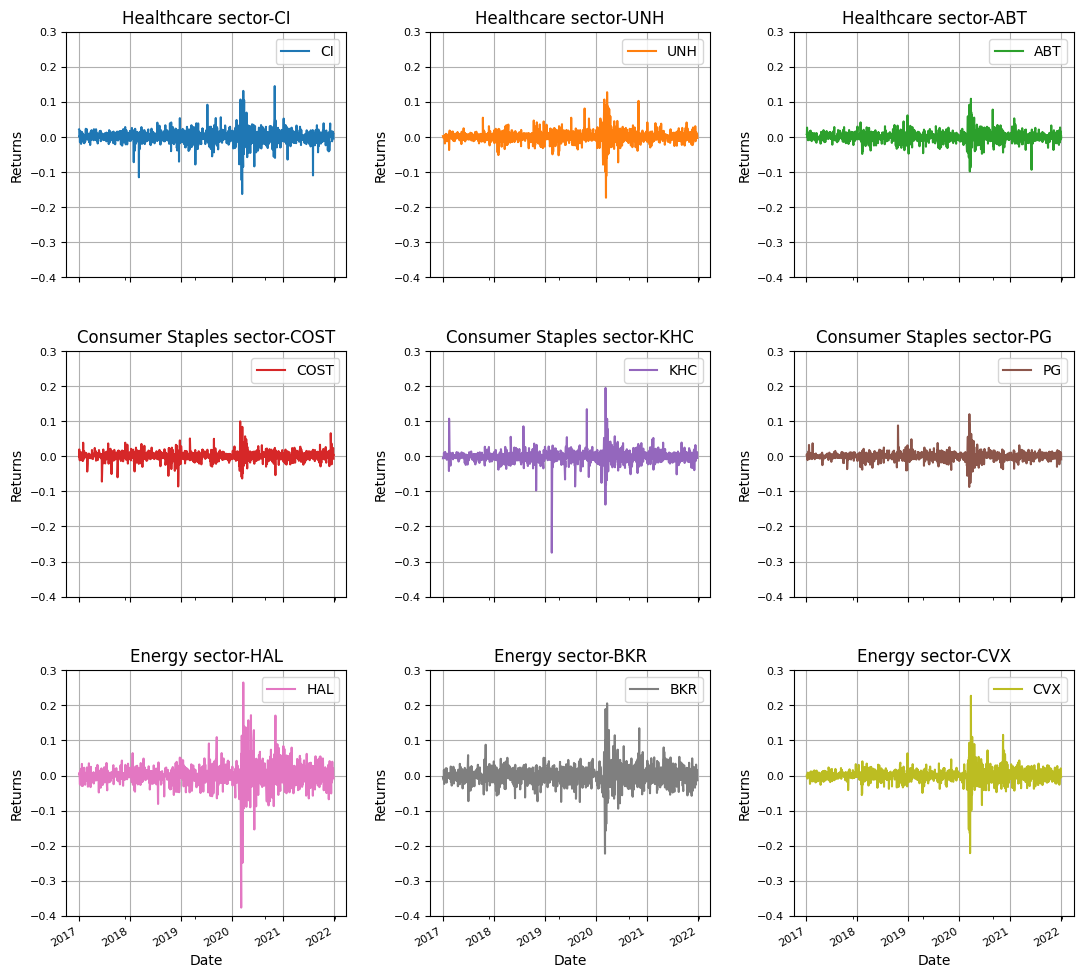

In [ ]:
titles = ['Healthcare sector-CI', 'Healthcare sector-UNH', 'Healthcare sector-ABT',
          'Consumer Staples sector-COST', 'Consumer Staples sector-KHC', 'Consumer Staples sector-PG',
          'Energy sector-HAL', 'Energy sector-BKR', 'Energy sector-CVX']

return_data.plot(subplots=True,
        grid=True,
        layout=(3,3),
        figsize=(13,13),
        xlabel='Date',
        ylabel='Returns',
        ylim=(-0.4, 0.3),
        legend=True,
        fontsize=8,
        title=titles)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

Volatility is the highest in the Energy Sector. The healthcare and consumer staples were relatively less. However, there was a common "shock" in the years between 2020 and 2021. This is due to the impact of COVID-19,regardless of sector. The max return is around 0.27; and min return is around -0.37.

### 1.2.1 Visualization of Sector- Healthcare






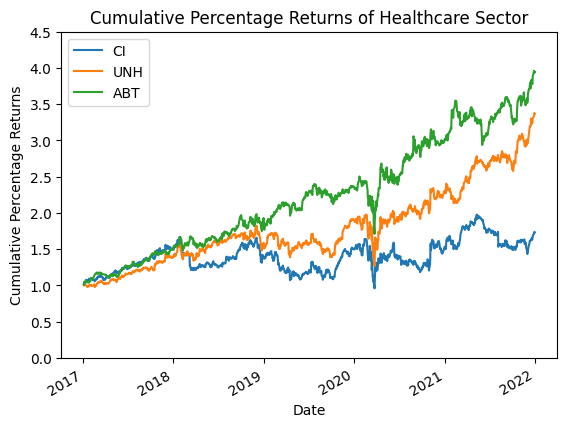

In [ ]:
# Calculate the cumulative product of the returns and plot the results of Healthcare sector

cumulative_returns = (1 + return_data.iloc[:,0:3]).cumprod()
cumulative_returns.plot(ylim=[0.0, 4.5])
plt.title('Cumulative Percentage Returns of Healthcare Sector')
plt.xlabel('Date')
plt.ylabel('Cumulative Percentage Returns')
plt.show()

In [ ]:
print("Average cumulative percentage returns for each stock:\n", return_data.iloc[:,0:3].mean(), '\n')
print("Average cumulative percentage returns for the sector:\n", return_data.iloc[:,0:3].mean().mean())

Average cumulative percentage returns for each stock:
 CI     0.000653
UNH    0.001128
ABT    0.001215
dtype: float64 

Average cumulative percentage returns for the sector:
 0.000998526319123784


ABT shows the highest growth, althought it was also negatively impacted during the period of COVID-19.

### 1.2.2 Visualization of Sector- Consumer Staples


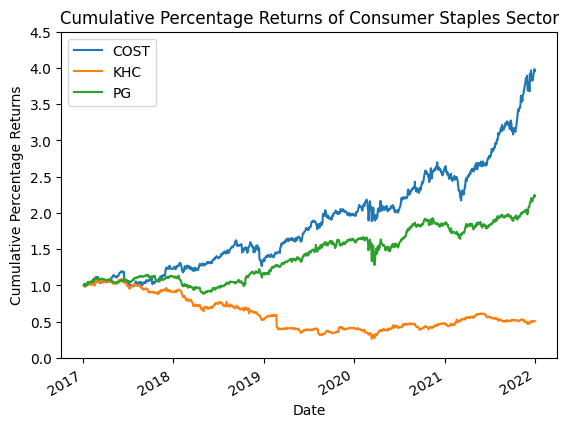

In [ ]:
# Calculate the cumulative product of the returns and plot the results of Consumer Staples sector

cumulative_returns = (1 + return_data.iloc[:,3:6]).cumprod()
cumulative_returns.plot(ylim=[0.0, 4.5])
plt.title('Cumulative Percentage Returns of Consumer Staples Sector')
plt.xlabel('Date')
plt.ylabel('Cumulative Percentage Returns')
plt.show()

COST shows a high growth, followed by PG. On the other hand, KHC faced a decline in growth rate.

In [ ]:
print("Average cumulative percentage returns for each stock:\n", return_data.iloc[:,3:6].mean(), '\n')
print("Average cumulative percentage returns for the sector:\n", return_data.iloc[:,3:6].mean().mean())

Average cumulative percentage returns for each stock:
 COST    0.001186
KHC    -0.000343
PG      0.000718
dtype: float64 

Average cumulative percentage returns for the sector:
 0.0005206068811201809



### 1.2.3 Visualization of Sector- Energy

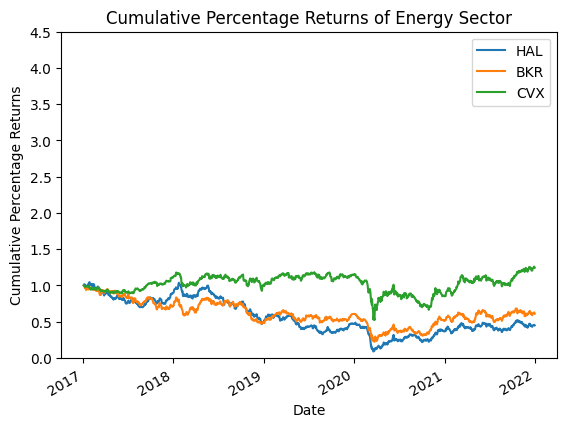

In [ ]:
# Calculate the cumulative product of the returns and plot the results on Energy sector

cumulative_returns = (1 + return_data.iloc[:,6:9]).cumprod()
cumulative_returns.plot(ylim=[0.0, 4.5])
plt.title('Cumulative Percentage Returns of Energy Sector')
plt.xlabel('Date')
plt.ylabel('Cumulative Percentage Returns')
plt.show()

These three stocks are relatively stable, but there is a slight downward trend.

In [ ]:
print("Average cumulative percentage returns for each stock: \n", return_data.iloc[:,6:9].mean(), '\n')
print("Average cumulative percentage returns for the sector: \n", "{:.8f}".format(return_data.iloc[:,6:9].mean().mean()))

Average cumulative percentage returns for each stock: 
 HAL   -0.000082
BKR   -0.000023
CVX    0.000393
dtype: float64 

Average cumulative percentage returns for the sector: 
 0.00009607


## 1.3 - Discussion of the Plots

- When we compared cumulative percentage return graphs, we found that the plots of healthcare sector and consumer staples sector have increased.
- In the consumer staples sector, the plot of KHC is slightly decreasing from 2017 to 2022. It suggests that the stock has not performed well and has provided a negative return on investment over the given time period.
- Although there were sudden drops and recoveries in energy sector between 2020 and 2021,  The overall cumulative percentage return plots for the energy sector have remained stable. The overall plots of BKR and HAL were under 1. It suggests that the stock has not performed well and has provided a negative return on investment over the given time period.

# 2 - Optimization Model



## 2.1 Model execution

### Data preparation for Non-linear model

In [ ]:
# download daily stock dataset
!gdown 1HT55Dp_K_wa3sftODCkijO2l2lwnc2zm

Downloading...
From: https://drive.google.com/uc?id=1HT55Dp_K_wa3sftODCkijO2l2lwnc2zm
To: /content/dailydata.csv
100% 156k/156k [00:00<00:00, 88.2MB/s]


In [ ]:
# Navigate daily return dataset
data=pd.read_csv('dailydata.csv')
data.head()

,Unnamed: 0,CI,UNH,ABT,COST,KHC,PG,HAL,BKR,CVX
0,2017-01-04,0.022104,0.002850,0.007938,0.000188,-0.005712,0.003563,0.003771,-0.004305,-0.000255
1,2017-01-05,0.021554,0.001667,0.008638,0.019717,-0.005745,0.006627,0.005726,-0.006178,-0.004328
2,2017-01-06,0.000706,0.001418,0.027204,-0.000491,-0.002542,-0.000352,0.008006,-0.006061,-0.004007
3,2017-01-09,0.003808,-0.002832,-0.000981,-0.011423,-0.002781,-0.007409,-0.010413,-0.011257,-0.008559
4,2017-01-10,-0.014893,-0.002284,0.013500,0.004287,-0.001859,-0.010782,-0.025504,-0.013599,-0.007597


In [ ]:
# Remove timestamp : the data is in order, we don't need the timestamp
del data['Unnamed: 0']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CI      1257 non-null   float64
 1   UNH     1257 non-null   float64
 2   ABT     1257 non-null   float64
 3   COST    1257 non-null   float64
 4   KHC     1257 non-null   float64
 5   PG      1257 non-null   float64
 6   HAL     1257 non-null   float64
 7   BKR     1257 non-null   float64
 8   CVX     1257 non-null   float64
dtypes: float64(9)
memory usage: 88.5 KB


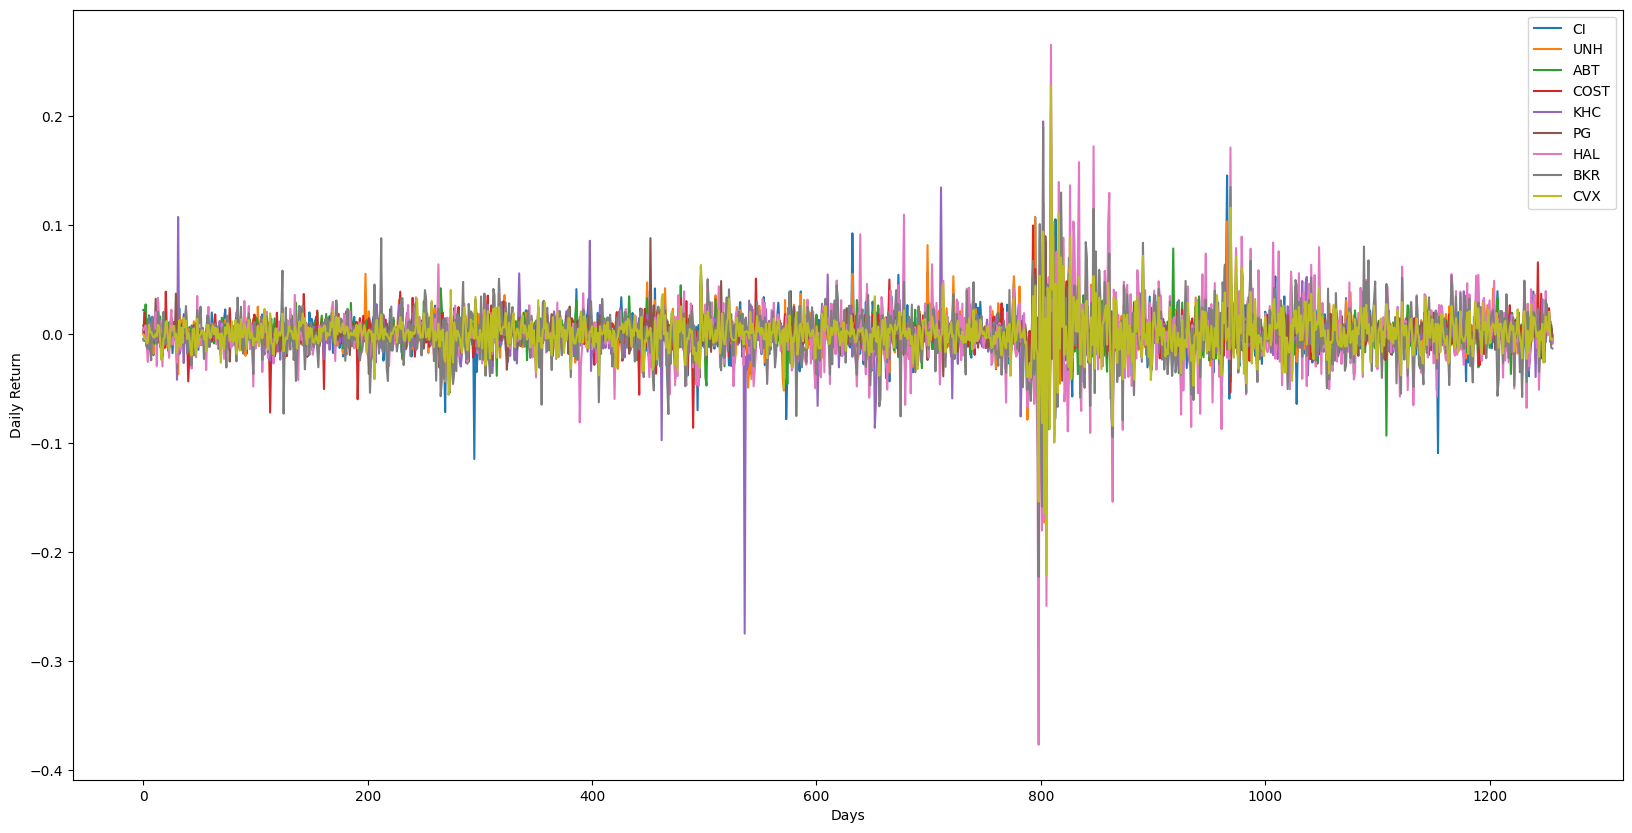

In [ ]:
# Visualize the volatility of daily return
fig,ax=plt.subplots(figsize=(20,10))
data.plot(ax=ax)
plt.xlabel('Days')
plt.ylabel('Daily Return')
plt.show()

In [ ]:
Avg_Return = pd.DataFrame(np.mean(data) ,columns=["Avg_Return"])
print(Avg_Return, '\n')
Std_Dev_Return = pd.DataFrame(np.std(data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return,'\n')

      Avg_Return
CI      0.000653
UNH     0.001128
ABT     0.001215
COST    0.001186
KHC    -0.000343
PG      0.000718
HAL    -0.000082
BKR    -0.000023
CVX     0.000393 

      Std_Dev_Return
CI          0.020715
UNH         0.017929
ABT         0.015637
COST        0.013570
KHC         0.019555
PG          0.012680
HAL         0.032696
BKR         0.027127
CVX         0.020813 



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### Covariance and Correlation

In [ ]:
# here's the covariance matrix
Covariance_matrix = data.cov()
Covariance_matrix

,CI,UNH,ABT,COST,KHC,PG,HAL,BKR,CVX
CI,0.000429,0.000284,0.000150,0.000098,0.000140,0.000094,0.000290,0.000225,0.000225
UNH,0.000284,0.000322,0.000158,0.000102,0.000123,0.000099,0.000213,0.000180,0.000193
ABT,0.000150,0.000158,0.000245,0.000102,0.000107,0.000098,0.000127,0.000114,0.000121
COST,0.000098,0.000102,0.000102,0.000184,0.000092,0.000083,0.000078,0.000078,0.000073
KHC,0.000140,0.000123,0.000107,0.000092,0.000383,0.000112,0.000207,0.000174,0.000151
PG,0.000094,0.000099,0.000098,0.000083,0.000112,0.000161,0.000100,0.000093,0.000086
HAL,0.000290,0.000213,0.000127,0.000078,0.000207,0.000100,0.001070,0.000659,0.000527
BKR,0.000225,0.000180,0.000114,0.000078,0.000174,0.000093,0.000659,0.000736,0.000400
CVX,0.000225,0.000193,0.000121,0.000073,0.000151,0.000086,0.000527,0.000400,0.000434


In [ ]:
# Correlation matrix
Corr_matrix = data.corr()
Corr_matrix

,CI,UNH,ABT,COST,KHC,PG,HAL,BKR,CVX
CI,1.000000,0.764366,0.462808,0.349011,0.344216,0.357271,0.427668,0.399530,0.520804
UNH,0.764366,1.000000,0.563217,0.419011,0.350825,0.433094,0.362460,0.369684,0.516276
ABT,0.462808,0.563217,1.000000,0.480723,0.349011,0.494941,0.249095,0.268275,0.372000
COST,0.349011,0.419011,0.480723,1.000000,0.345277,0.481019,0.175762,0.210614,0.259499
KHC,0.344216,0.350825,0.349011,0.345277,1.000000,0.452708,0.323557,0.328350,0.369730
PG,0.357271,0.433094,0.494941,0.481019,0.452708,1.000000,0.240874,0.270665,0.325444
HAL,0.427668,0.362460,0.249095,0.175762,0.323557,0.240874,1.000000,0.742296,0.774100
BKR,0.399530,0.369684,0.268275,0.210614,0.328350,0.270665,0.742296,1.000000,0.707830
CVX,0.520804,0.516276,0.372000,0.259499,0.369730,0.325444,0.774100,0.707830,1.000000


In [ ]:
# creating covariance table on stock return dataframe
pd.set_option('display.width', 1000)
data_cov = data.cov()
with pd.option_context('expand_frame_repr', False):
    print('Covariance Matrix:')
print(data_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
data_return = data.mean()
print('Average Return:')
print(data_return)

Covariance Matrix:
            CI       UNH       ABT      COST       KHC        PG       HAL       BKR       CVX
CI    0.000429  0.000284  0.000150  0.000098  0.000140  0.000094  0.000290  0.000225  0.000225
UNH   0.000284  0.000322  0.000158  0.000102  0.000123  0.000099  0.000213  0.000180  0.000193
ABT   0.000150  0.000158  0.000245  0.000102  0.000107  0.000098  0.000127  0.000114  0.000121
COST  0.000098  0.000102  0.000102  0.000184  0.000092  0.000083  0.000078  0.000078  0.000073
KHC   0.000140  0.000123  0.000107  0.000092  0.000383  0.000112  0.000207  0.000174  0.000151
PG    0.000094  0.000099  0.000098  0.000083  0.000112  0.000161  0.000100  0.000093  0.000086
HAL   0.000290  0.000213  0.000127  0.000078  0.000207  0.000100  0.001070  0.000659  0.000527
BKR   0.000225  0.000180  0.000114  0.000078  0.000174  0.000093  0.000659  0.000736  0.000400
CVX   0.000225  0.000193  0.000121  0.000073  0.000151  0.000086  0.000527  0.000400  0.000434


Average Return:
CI      0.000

### Build the Nonlinear Optimization Model

In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
# each one is a stock
m.CI = Var(within=NonNegativeReals, bounds=(0,1))   # 1
m.UNH = Var(within=NonNegativeReals, bounds=(0,1))  # 2
m.ABT = Var(within=NonNegativeReals, bounds=(0,1))  # 3
m.COST = Var(within=NonNegativeReals, bounds=(0,1)) # 4
m.KHC = Var(within=NonNegativeReals, bounds=(0,1))  # 5
m.PG = Var(within=NonNegativeReals, bounds=(0,1))   # 6
m.HAL = Var(within=NonNegativeReals, bounds=(0,1))  # 7
m.BKR = Var(within=NonNegativeReals, bounds=(0,1))  # 8
m.CVX = Var(within=NonNegativeReals, bounds=(0,1))  # 9

In [ ]:
# declare objective
m.objective = Objective(expr =
                        m.CI*data_return[0] +
                        m.UNH*data_return[1] +
                        m.ABT*data_return[2] +
                        m.COST*data_return[3] +
                        m.KHC*data_return[4] +
                        m.PG*data_return[5] +
                        m.HAL*data_return[6] +
                        m.BKR*data_return[7] +
                        m.CVX*data_return[8],
                        sense=maximize) # yes, we want to MAX our returns!


# declare constraints
# 1. Sum of all proportions = 1
m.sum_proportions = Constraint(expr = m.CI + m.UNH + m.ABT + m.COST + m.KHC + m.PG + m.HAL + m.BKR + m.CVX  == 1)

# 2. Set maximum risk: WE ARE INCLUDING THIS CONSTRAINT NOW FOR TECHNICAL REASONS (see below), YOU CAN (and should!) IGNORE IT FOR NOW!
m.total_risk = Constraint(expr = m.CI + m.UNH + m.ABT + m.COST + m.KHC + m.PG + m.HAL + m.BKR + m.CVX >= 0.0)

In [ ]:
# creating calculations table for calculate the risk
# 3. Calculate risk
def calc_risk(m):
  variables = m.CI,m.UNH,m.ABT,m.COST,m.KHC,m.PG,m.HAL,m.BKR,m.CVX
  tickers = ["CI","UNH","ABT","COST","KHC","PG","HAL","BKR","CVX"]
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*data_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)

# 4. Set the max_risk of 0.0003
max_risk = 0.0003

# Sequence of risk levels
risk_limits = np.arange(0.0001, max_risk, 0.00000125) # take very tiny steps
print(risk_limits)

# Number of risks computed
len(risk_limits)

[0.0001     0.00010125 0.0001025  0.00010375 0.000105   0.00010625
 0.0001075  0.00010875 0.00011    0.00011125 0.0001125  0.00011375
 0.000115   0.00011625 0.0001175  0.00011875 0.00012    0.00012125
 0.0001225  0.00012375 0.000125   0.00012625 0.0001275  0.00012875
 0.00013    0.00013125 0.0001325  0.00013375 0.000135   0.00013625
 0.0001375  0.00013875 0.00014    0.00014125 0.0001425  0.00014375
 0.000145   0.00014625 0.0001475  0.00014875 0.00015    0.00015125
 0.0001525  0.00015375 0.000155   0.00015625 0.0001575  0.00015875
 0.00016    0.00016125 0.0001625  0.00016375 0.000165   0.00016625
 0.0001675  0.00016875 0.00017    0.00017125 0.0001725  0.00017375
 0.000175   0.00017625 0.0001775  0.00017875 0.00018    0.00018125
 0.0001825  0.00018375 0.000185   0.00018625 0.0001875  0.00018875
 0.00019    0.00019125 0.0001925  0.00019375 0.000195   0.00019625
 0.0001975  0.00019875 0.0002     0.00020125 0.0002025  0.00020375
 0.000205   0.00020625 0.0002075  0.00020875 0.00021    0.0002

160

### Run the model

### Infeasible solutions

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return

for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)

  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
     continue
  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.CI(), m.UNH(), m.ABT(), m.COST(), m.KHC(), m.PG(), m.HAL(), m.BKR(), m.CVX()]
  # store our returns
  returns[r] =  m.CI()*data_return[0] + m.UNH()*data_return[1] + m.ABT()*data_return[2] + m.COST()*data_return[3] + m.KHC()*data_return[4] + m.PG()*data_return[5] + m.HAL()*data_return[6] + m.BKR()*data_return[7] + m.CVX()*data_return[8]

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iter

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 0.9806756973266602
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of so

  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 0.9831943511962891
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of so

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 1.4460880756378174
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of so

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 2.3765573501586914
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of so

  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 1.1331098079681396
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of so

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02854323387145996
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# =====

In [ ]:
#param_analysis

## 2.2 Plot with allocation of the stocks

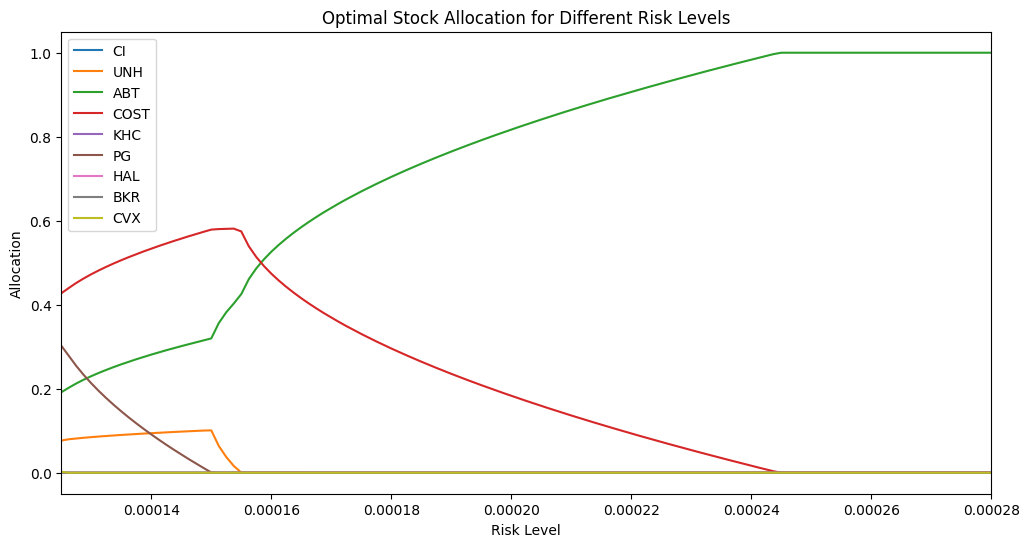

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
fig, ax = plt.subplots(figsize = (12,6))
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = [ 'CI', 'UNH', 'ABT','COST', 'KHC', 'PG', 'HAL', 'BKR', 'CVX']
param_analysis.plot(ax=ax)
plt.xlabel('Risk Level')
plt.ylabel('Allocation')
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.xlim(0.000125, 0.00028)
plt.show()

In [ ]:
# allocation of each stock based on input risk level
param_analysis[0.00015000000000000012]

[6.11440566795563e-06,
 0.10081325277419972,
 0.31972218896866816,
 0.5787516852033756,
 2.1804752370576486e-06,
 0.0006928673444712069,
 2.646823525192168e-06,
 3.034667534556063e-06,
 6.029337320505806e-06]

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print('Subset of risk: ','\n',risk,'\n')

reward = list(returns.values()) # coerce dict_values to a list
print('Subset of reward: ','\n',reward) # we aren't allowed to name our value 'return' - this is a reserved name.

Subset of risk:  
 [0.00010750000000000002, 0.00010875000000000003, 0.00011250000000000004, 0.00011500000000000004, 0.00011625000000000005, 0.00011875000000000005, 0.00012000000000000006, 0.00012125000000000006, 0.00012250000000000005, 0.00012375000000000005, 0.00012500000000000006, 0.00012625000000000006, 0.00012750000000000006, 0.00012875000000000007, 0.00013000000000000007, 0.00013125000000000007, 0.00013250000000000008, 0.00013375000000000008, 0.00013500000000000008, 0.00013625000000000009, 0.0001375000000000001, 0.0001387500000000001, 0.0001400000000000001, 0.0001412500000000001, 0.0001425000000000001, 0.0001437500000000001, 0.0001450000000000001, 0.0001462500000000001, 0.00014750000000000012, 0.00014875000000000012, 0.00015000000000000012, 0.00015125000000000013, 0.00015250000000000013, 0.00015375000000000013, 0.00015500000000000014, 0.00015625000000000014, 0.00015750000000000014, 0.00015875000000000015, 0.00016000000000000015, 0.00016125000000000015, 0.00016250000000000016, 0.00

In [ ]:
# we can identify that among 160 risk level, ten risk levels are discard due to the infeasible problem

tmp1=pd.DataFrame(risk_limits)
tmp2=pd.DataFrame(risk)

print('The number of risk level: ',tmp1.shape[0])
print('The number of risk subset: ',tmp2.shape[0])


The number of risk level:  160
The number of risk subset:  150


## 2.3 Plot with efficient frontier

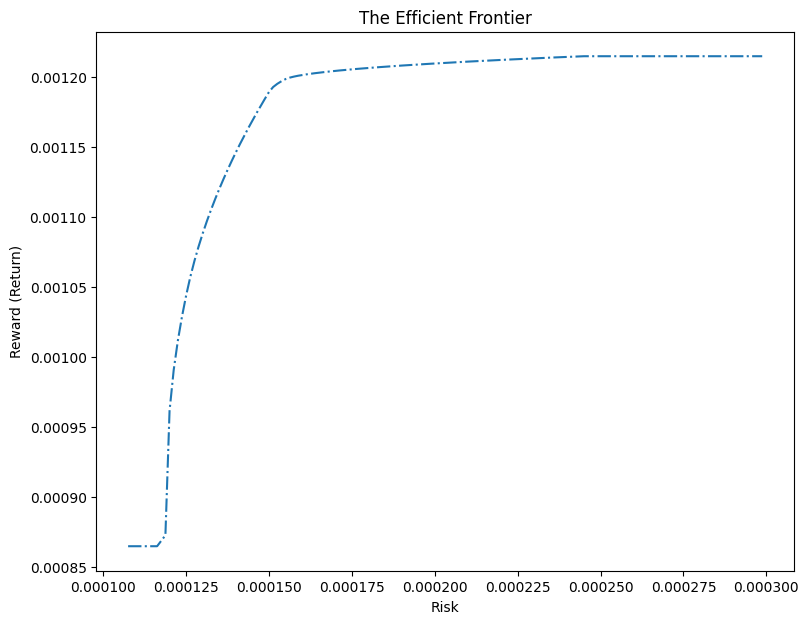

In [ ]:
# plot! pylab makes it easy
fig, ax = plt.subplots(figsize = (9,7))
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

## 2.4 Portfolio selection

### Selected Stocks: COST(58%), ABT(32%), UNH(10%)

- According to "Optimal Stock Allocation for Different Risk Levels", we are allocating 58% of our budget to Costco (COST), 32% to Abbot Lab(ABT), and 10% to UnitedHealth Group (UNH).



# 3 - Analysis

## 3.1 - Buy-and-Hold strategy for the MPT portfolio

## 3.2 - Momentum trading strategy for each stock in the MPT portfolio

## 3.3 - Momentum trading strategy for the entire MPT portfolio

## 3.4 - Buy-and-Hold strategy for the S&P 500 index

## 3.5 - Plot Comparing the Investment Strategies

## 3.6 - Discussion and Comparison of the Investment Strategies

# 4 - Conclusion

## 4.1 - Thoughts and Insights

## 4.2 - Individual Contributions